<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/Timing_Complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget https://cs.uit.edu.vn/data.txt

--2020-06-09 09:09:50--  https://cs.uit.edu.vn/data.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84410 (82K) [text/plain]
Saving to: ‘data.txt’

data.txt            100%[===================>]  82.43K  --.-KB/s    in 0.04s   

2020-06-09 09:09:51 (2.12 MB/s) - ‘data.txt’ saved [84410/84410]



In [10]:
!ls

data.txt  sample_data


In [0]:
data=pd.read_csv('data.txt',header=None)
data.columns=['Complexity','Timing']

In [36]:
data.head()

,Complexity,Timing
0,4032139,1.200580
1,2055486,0.509774
2,5626651,1.476080
3,42065,0.007651
4,6297788,1.661560


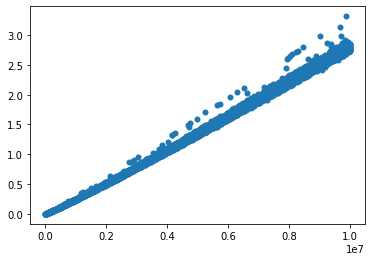

In [42]:
plt.scatter(data['Complexity'],data['Timing'],linewidths=0.01)
plt.show()